The purpose of this code is to analyse the impact of the different features on the probablity(particulary the top 5) of a particulare frame in a video and how that top 5 catg. changes through the course of the video.

In [13]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
import cv2
import numpy as np
import os
import pandas as pd
from PIL import Image
import os
import plotly.express as px
import matplotlib.pyplot as plt

In [35]:
vid_number=19
#frames whose key features you want to check
frame_chk=187

In [36]:
dir='C:/Users/Mabon Ninan/Desktop/code/Probabilities/frames-tvsum/'+str(vid_number)+'/'
files = next(os.walk(dir))[2] #dir is your directory path as string
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]    
top5_prob=0
top5_catid=0
prob=[]
prob2=[]

In [37]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()
print(" ")

Using cache found in C:\Users\Mabon Ninan/.cache\torch\hub\pytorch_vision_v0.10.0


In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [38]:

for i in range(len(files)):
    path1=dir+str(i)+'.png'
    input_image = Image.open(path1)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    with torch.no_grad():
        output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    if(i==frame_chk):
        top5_prob, top5_catid = torch.topk(probabilities, 5)
    prob.append(np.array(probabilities))
probabilities_dataframe = pd.DataFrame(np.array(prob))

In [39]:
temp = Image.open(dir+'1.png')
w,h=temp.size
s=((224+40)*h)/w
preprocess = transforms.Compose([
    transforms.Resize(int(s)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
for i in range(len(files)):
    path1=dir+str(i)+'.png'
    input_image = Image.open(path1)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    with torch.no_grad():
        output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    prob2.append(np.array(probabilities))
probabilities_dataframe2 = pd.DataFrame(np.array(prob2))

In [40]:
# Show top categories per image
print("FOLLOWING ARE THE TOP 5 CATEGORIES OF THE FRAME WE HAVE CHOSEN TO VIEW :")
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]])

FOLLOWING ARE THE TOP 5 CATEGORIES OF THE FRAME WE HAVE CHOSEN TO VIEW :
black grouse
kite
water ouzel
quail
ptarmigan


In [43]:
x = np.array(list(range(len(files))))
for i in range(top5_prob.size(0)):

    series1=np.array(probabilities_dataframe[int(top5_catid[i])])
    series2=np.array(probabilities_dataframe2[int(top5_catid[i])])
    fig = px.line(x=x, y=[series1, series2])
    fig.update_layout(
        title="CATEGORIES: "+categories[int(top5_catid[i])],
        xaxis_title="Frames",
        yaxis_title="Probability",
        legend_title="Crop Method",

    )
    fig.show()
    #fig.write_html("C:/Users/Mabon Ninan/Desktop/code/Probabilities/plots/keyframe_"+str(frame_chk)+"_category_"+categories[int(top5_catid[i])]+".html")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


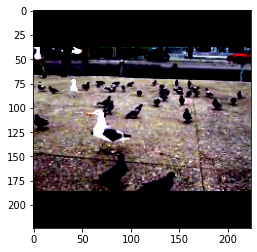

In [50]:

#sample image crop
path1=dir+str(120)+'.png'
input_image = Image.open(path1)
input_tensor = preprocess(input_image)
plt.imshow(input_tensor.permute(1, 2, 0))
